In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
dls = ImageDataLoaders.from_folder(path, valid='valid')

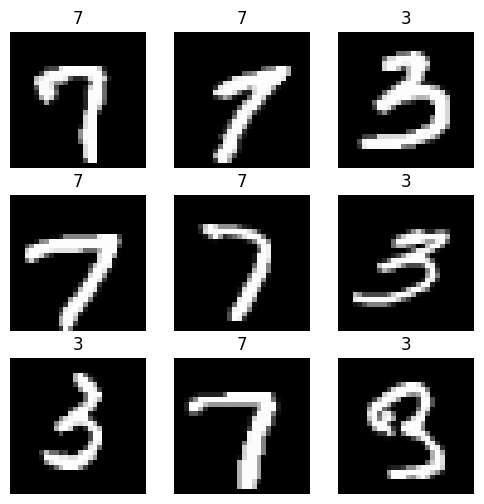

In [3]:
dls.show_batch(max_n=9, figsize=(6,6))

In [4]:
print(f"Training set size: {len(dls.train_ds)}")
print(f"Validation set size: {len(dls.valid_ds)}")

Training set size: 12396
Validation set size: 2038


In [5]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 67.5MB/s]


              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1010
           7       1.00      1.00      1.00      1028

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038



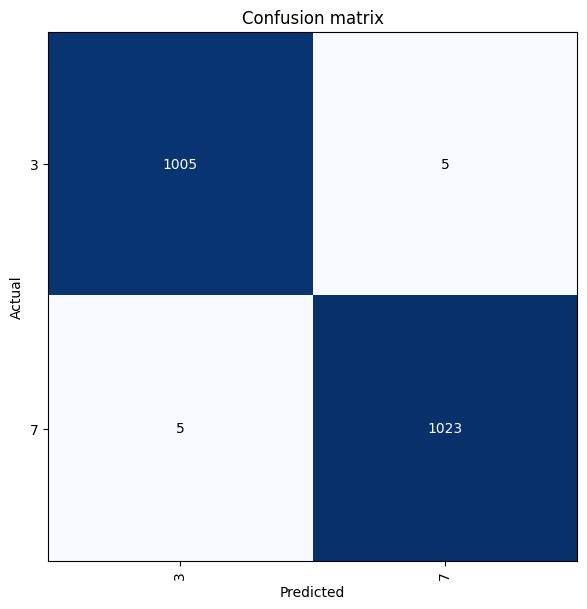

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()
interp.plot_confusion_matrix(figsize=(6,6))

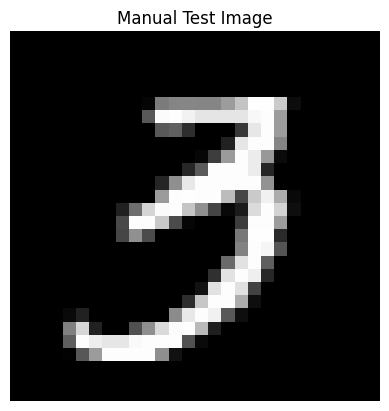

Predicted: 3


In [7]:
img_path = dls.valid_ds.items[0]
img = PILImage.create(img_path)

plt.imshow(img)
plt.axis('off')
plt.title("Manual Test Image")
plt.show()

pred_class, pred_idx, probs = learn.predict(img)
print(f"Predicted: {pred_class}")